In [1]:
import pandas as pd

df = pd.read_csv("./times.csv")
df["time"] = df["time"]
df

,algorithm,array_length,time
0,plain,128,0.000006
1,plain,256,0.000008
2,plain,512,0.000010
3,plain,1024,0.000016
4,plain,2048,0.000027
5,plain,4096,0.000051
6,plain,8192,0.000096
7,plain,16384,0.000182
8,auto,128,0.000006
9,auto,256,0.000008


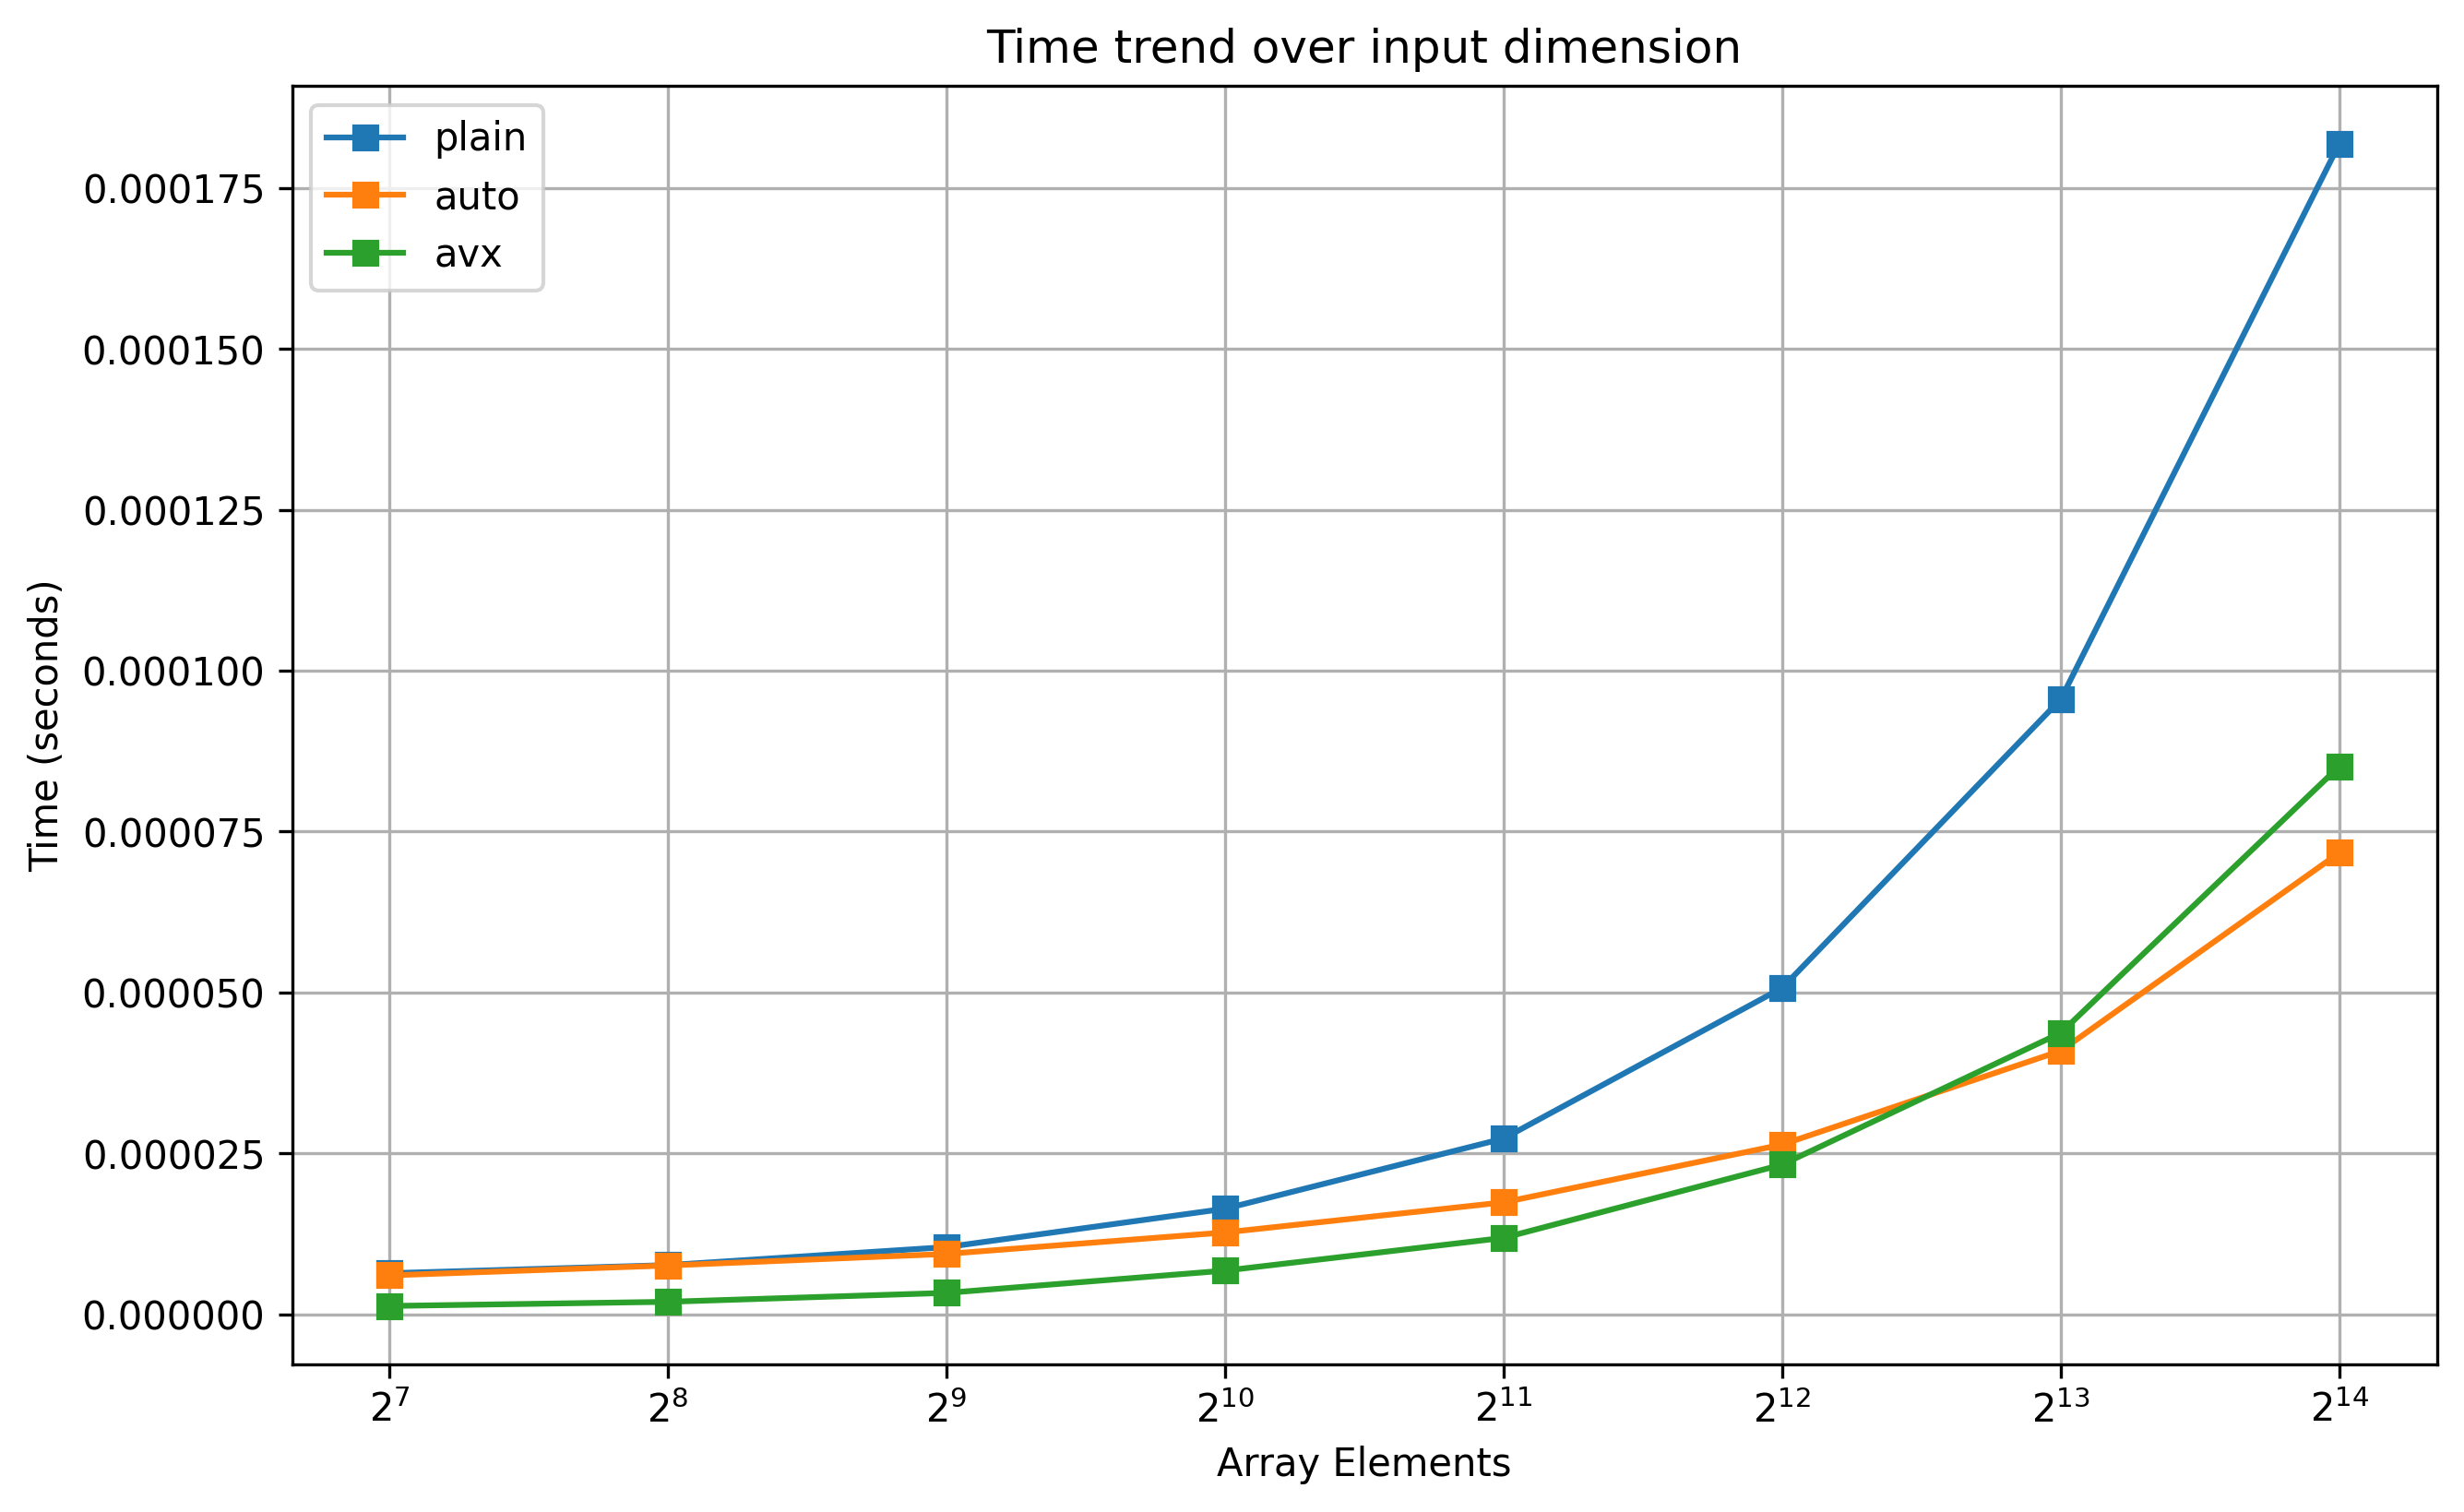

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Time trend over input dimension")

algs = df["algorithm"].unique()
for alg in algs:
    tmp = df[df["algorithm"] == alg][["array_length", "time"]]
    plt.plot(tmp["array_length"], tmp["time"], marker="s", label=alg)

plt.xlabel("Array Elements")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [3]:
speed_ups = []

algs = df["algorithm"].unique()
sizes = df["array_length"].unique()

for alg in algs:
    for s in sizes:
        mask_plain = (df["algorithm"] == "plain") & (df["array_length"] == s)
        mask = (df["algorithm"] == alg) & (df["array_length"] == s)

        time_plain = df[mask_plain]["time"].iloc[0]
        time_alg = df[mask]["time"].iloc[0]
        speed_ups.append(time_plain / time_alg)

df["speed_up"] = speed_ups
df

,algorithm,array_length,time,speed_up
0,plain,128,0.000006,1.000000
1,plain,256,0.000008,1.000000
2,plain,512,0.000010,1.000000
3,plain,1024,0.000016,1.000000
4,plain,2048,0.000027,1.000000
5,plain,4096,0.000051,1.000000
6,plain,8192,0.000096,1.000000
7,plain,16384,0.000182,1.000000
8,auto,128,0.000006,1.054772
9,auto,256,0.000008,1.007698


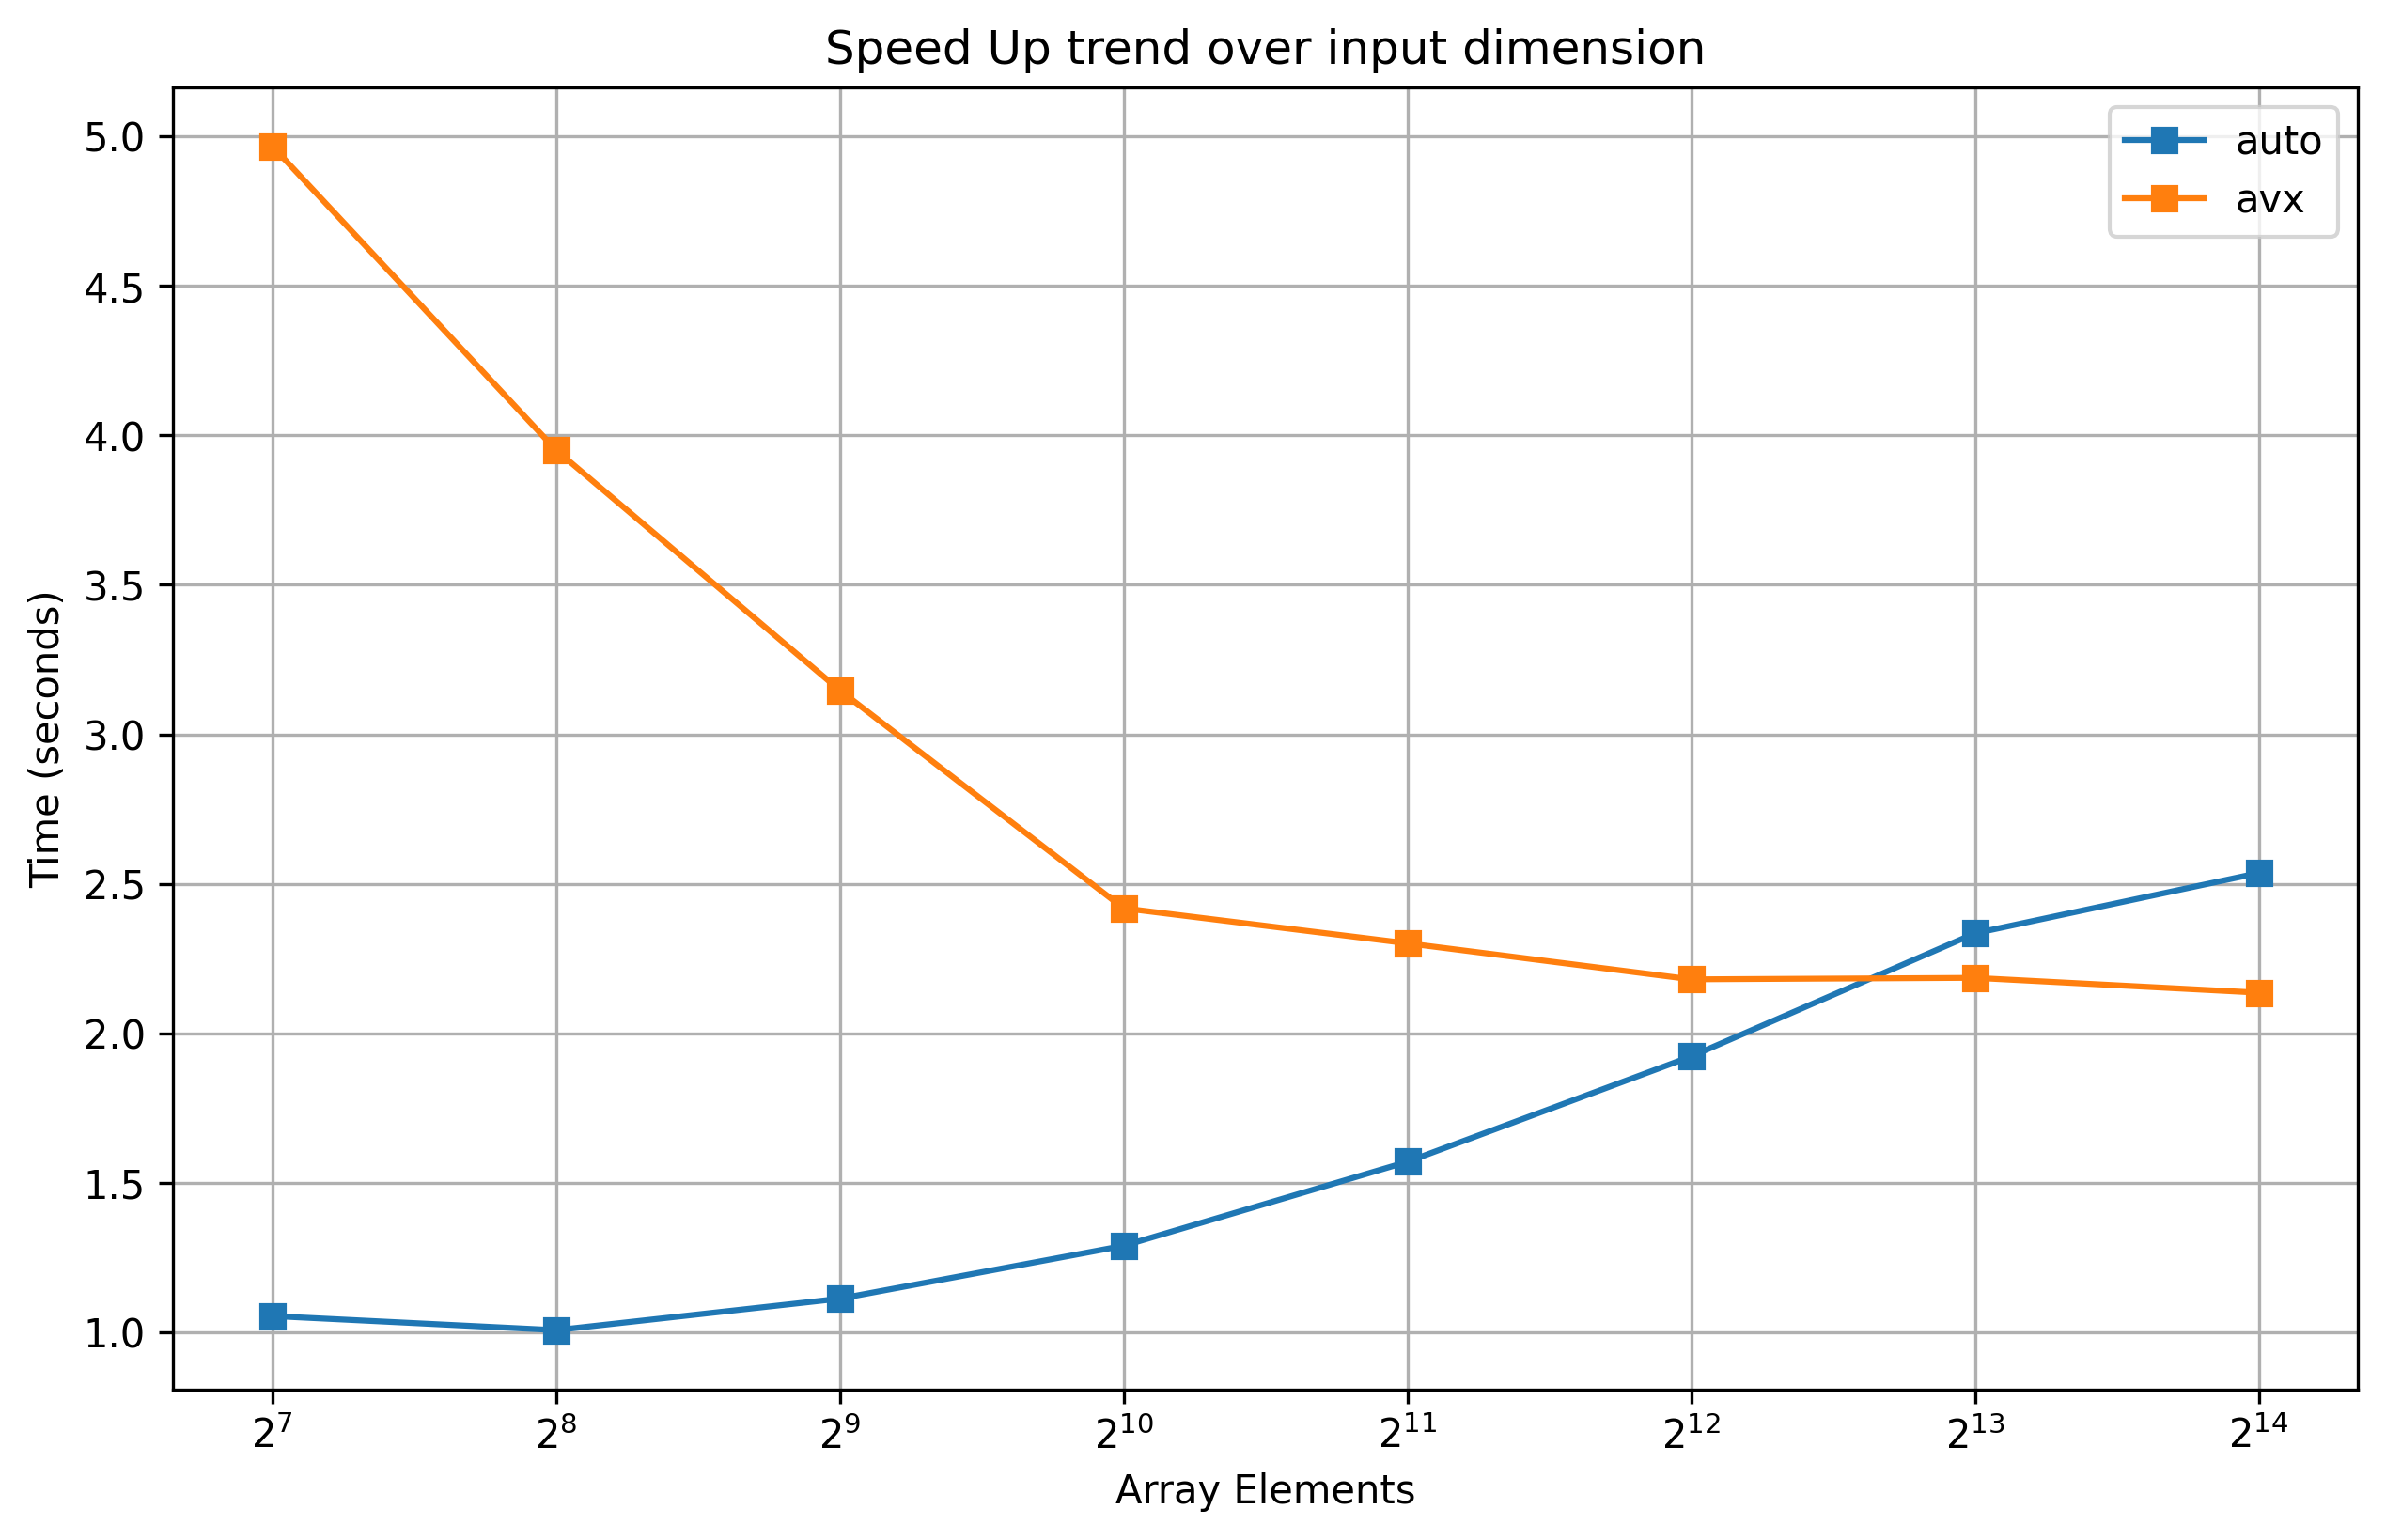

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up trend over input dimension")

for alg in algs:
    tmp = df[df["algorithm"] == alg][["array_length", "speed_up"]]
    if alg != "plain":
        plt.plot(tmp["array_length"], tmp["speed_up"], marker="s", label=alg)

plt.xlabel("Array Elements")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()